In [70]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [327]:
import tensorflow as tf
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

In [328]:
import sys
sys.path.append('..')
from dataset import batcher

In [329]:
MODEL_DIR = '../saved_models/'
LR_RATE = 0.001
OPT = tf.keras.optimizers.Adam(learning_rate=LR_RATE)
LOSS = 'MeanSquaredError'
METRICS = ['RootMeanSquaredError']

In [385]:
# Get test split
test_batcher = batcher.Batcher(bucket=False, shuffle=False, split='test', repeat=1, batch_size=652).get_dataset()
x_true = []
y_true = []
for x, y in test_batcher:
    x_true.append(x)
    y_true.append(y)

print(np.shape(x_true))

(1, 652, 224, 224, 3)


In [386]:
# Load model
experiments = ['imagery_sample_vgg_regression_32conv']

def load_model_from_dir(model_name):
    model_path = MODEL_DIR + model_name + '.h5'
    model = tf.keras.models.load_model(model_path, compile=False)
    
    return model

In [387]:
# Get consumption predictions
trained_model = load_model_from_dir(experiments[0])
trained_model.compile(
            loss=LOSS,
            optimizer=OPT,
            metrics=METRICS,
        )

y_preds = trained_model.predict_on_batch(x_true)
print(y_preds)

2023-02-04 12:49:37.368808: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[[-0.11421838]
 [-0.11429341]
 [-0.11547702]
 [-0.11486156]
 [-0.11468622]
 [-0.11574895]
 [-0.11475874]
 [-0.11628719]
 [-0.11572001]
 [-0.11547702]
 [-0.11495953]
 [-0.11518272]
 [-0.11601532]
 [-0.11529958]
 [-0.11623546]
 [-0.11543007]
 [-0.11613171]
 [-0.11530247]
 [-0.1160197 ]
 [-0.11601081]
 [-0.11716568]
 [-0.11426034]
 [-0.11513256]
 [-0.11429017]
 [-0.11486153]
 [-0.11443821]
 [-0.11518272]
 [-0.11586582]
 [-0.11539605]
 [-0.11438017]
 [-0.11453518]
 [-0.11516707]
 [-0.11636206]
 [-0.11550208]
 [-0.11461795]
 [-0.11603307]
 [-0.11645553]
 [-0.11589951]
 [-0.11516011]
 [-0.11573838]
 [-0.11661249]
 [-0.11535186]
 [-0.11466024]
 [-0.11550169]
 [-0.11469161]
 [-0.11582834]
 [-0.11440279]
 [-0.11586992]
 [-0.11597281]
 [-0.11671288]
 [-0.11695897]
 [-0.1153567 ]
 [-0.1166342 ]
 [-0.11542251]
 [-0.114788  ]
 [-0.1148145 ]
 [-0.11694913]
 [-0.11585131]
 [-0.11696913]
 [-0.11546151]
 [-0.11563079]
 [-0.11429341]
 [-0.11665802]
 [-0.11537476]
 [-0.11563079]
 [-0.11414243]
 [-0.11582

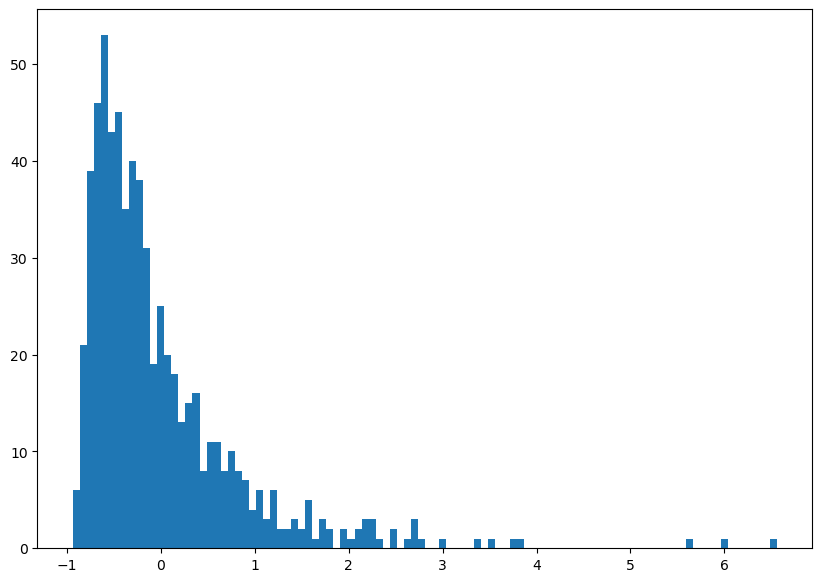

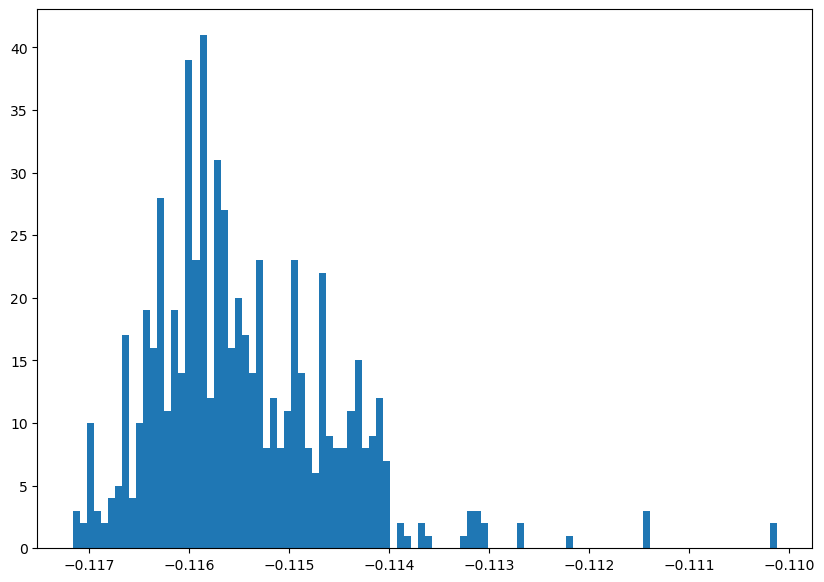

In [388]:
# Find r-squared
y_true = np.squeeze(y_true)
y_preds = np.squeeze(y_preds)

# Plot histograms
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(y_true, bins = 100)
plt.show()

fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(y_preds, bins = 100)
plt.show()


r2 = pearsonr(y_true, y_preds)[0]

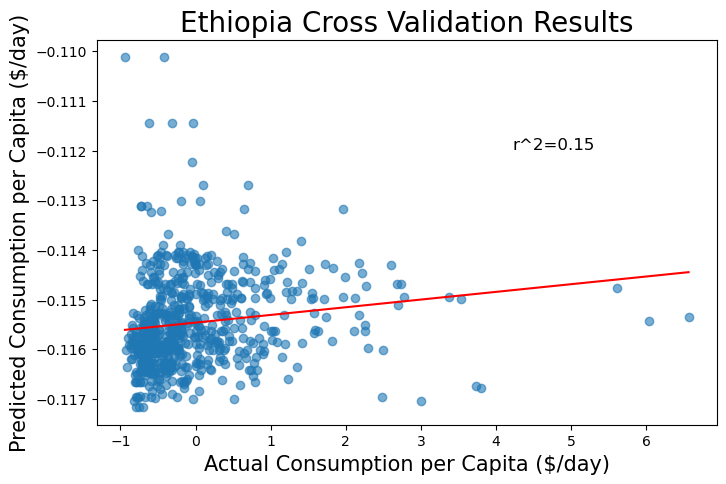

In [389]:
# Plot predictions
country = 'Ethiopia'
fig = plt.figure(figsize=(8,5))
plt.scatter(y_true, y_preds, alpha=0.6)
plt.plot(np.unique(y_true), np.poly1d(np.polyfit(y_true, y_preds, 1))(np.unique(y_true)), color='red')
plt.text(0.5, 0.5, f'r^2={round(r2, 2)}', ha='left', va='top', size=12, transform=ax.transAxes)
plt.xlabel('Actual Consumption per Capita ($/day)', fontsize=15)
plt.ylabel('Predicted Consumption per Capita ($/day)', fontsize=15)
plt.title(f'{country} Cross Validation Results', fontsize=20)
# plt.xlim([np.min(y_true), 10])
# plt.ylim([np.min(y_true), 10])
plt.show()